In [1]:
import pandas as pd
import numpy as np

# Number of data points to generate
num_samples = 1000

# Generate normal data
data = {
    "engine_temperature": np.random.normal(loc=80, scale=5, size=num_samples),  # normal around 80°C
    "battery_voltage": np.random.normal(loc=12.5, scale=0.3, size=num_samples), # normal around 12.5V
    "vibration": np.random.normal(loc=2, scale=0.5, size=num_samples),          # arbitrary normal vibration level
    "fuel_efficiency": np.random.normal(loc=25, scale=3, size=num_samples),    # normal around 25 MPG
    "mileage": np.linspace(0, 50000, num_samples)  # mileage increasing over time
}

# Introduce anomalies

# Engine Temperature: Overheating between 50-60th sample
data["engine_temperature"][50:60] = np.random.normal(loc=95, scale=2, size=10)

# Battery Voltage: Low voltage between 200-210th sample
data["battery_voltage"][200:210] = np.random.normal(loc=10, scale=0.2, size=10)

# Vibration: Excessive vibration between 400-410th sample
data["vibration"][400:410] = np.random.normal(loc=5, scale=0.3, size=10)

# Fuel Efficiency: Sudden drop between 600-610th sample
data["fuel_efficiency"][600:610] = np.random.normal(loc=15, scale=2, size=10)

# Mileage: Abrupt spike between 800-810th sample
data["mileage"][800:810] = np.random.normal(loc=8100, scale=0.5, size=10)

# Create DataFrame
df = pd.DataFrame(data)

# Labeling anomalies
df["label"] = "normal"
df.loc[50:60, "label"] = "anomaly"  # Overheating anomaly
df.loc[200:210, "label"] = "anomaly"  # Low voltage anomaly
df.loc[400:410, "label"] = "anomaly"  # Excessive vibration anomaly
df.loc[600:610, "label"] = "anomaly"  # Low fuel efficiency anomaly
df.loc[800:810, "label"] = "anomaly"  # Abrupt mileage spike anomaly

# Display the first few rows of the DataFrame
print(df.head())


   engine_temperature  battery_voltage  vibration  fuel_efficiency    mileage   
0           72.793076        12.264566   2.277172        24.372874    0.00000  \
1           82.764507        12.713838   2.114908        26.731860   50.05005   
2           77.244834        12.934071   1.419812        23.552664  100.10010   
3           78.785184        12.562841   2.332784        28.518675  150.15015   
4           74.696610        12.075126   1.870835        28.516888  200.20020   

    label  
0  normal  
1  normal  
2  normal  
3  normal  
4  normal  


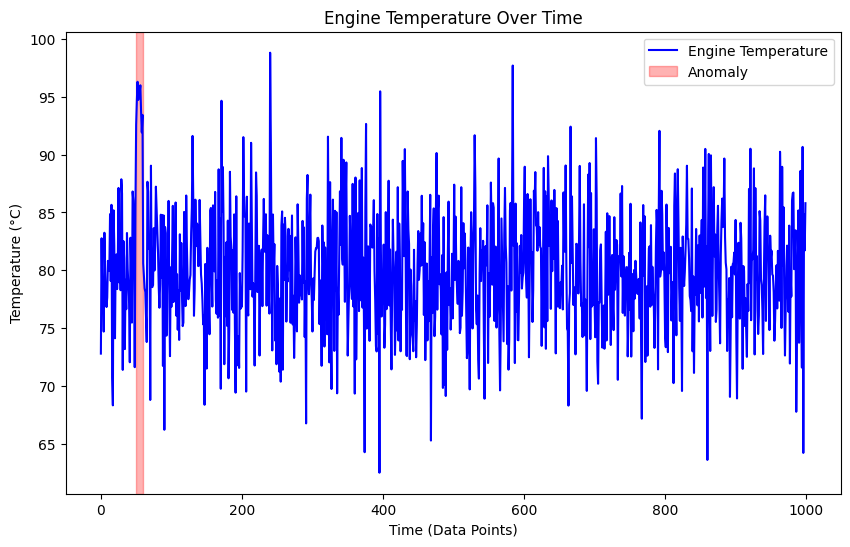

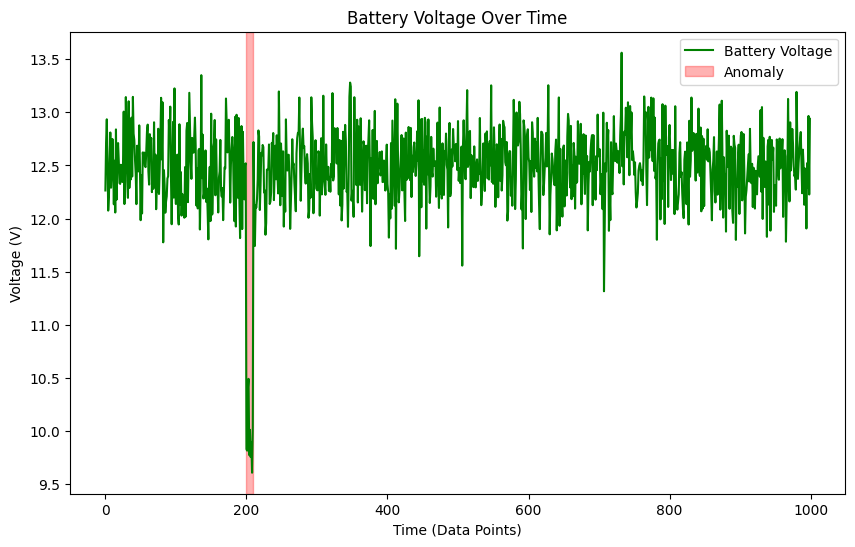

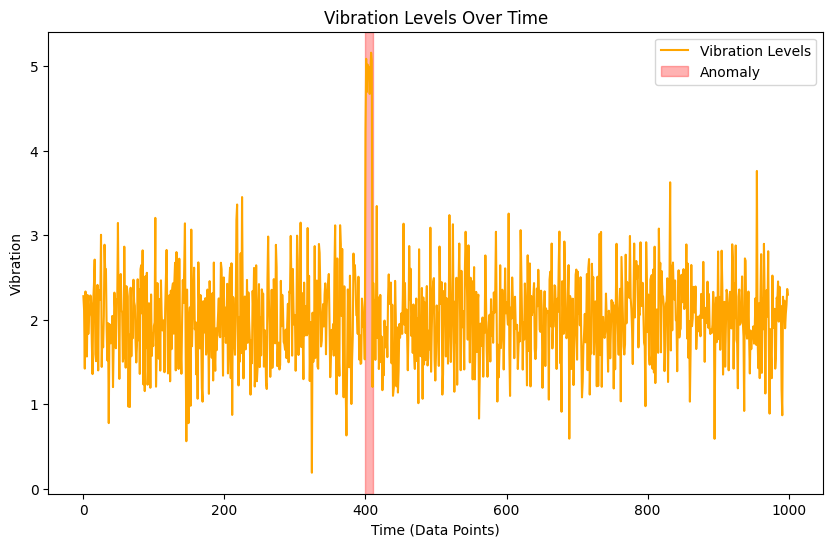

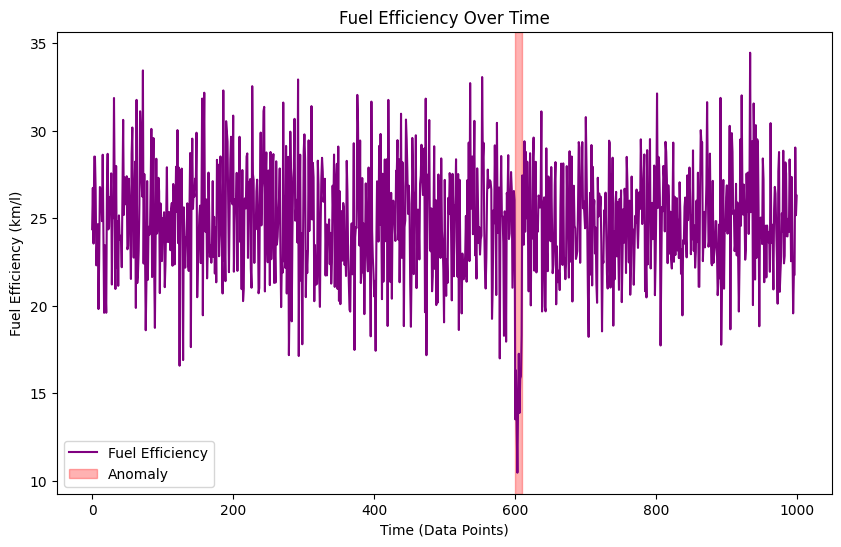

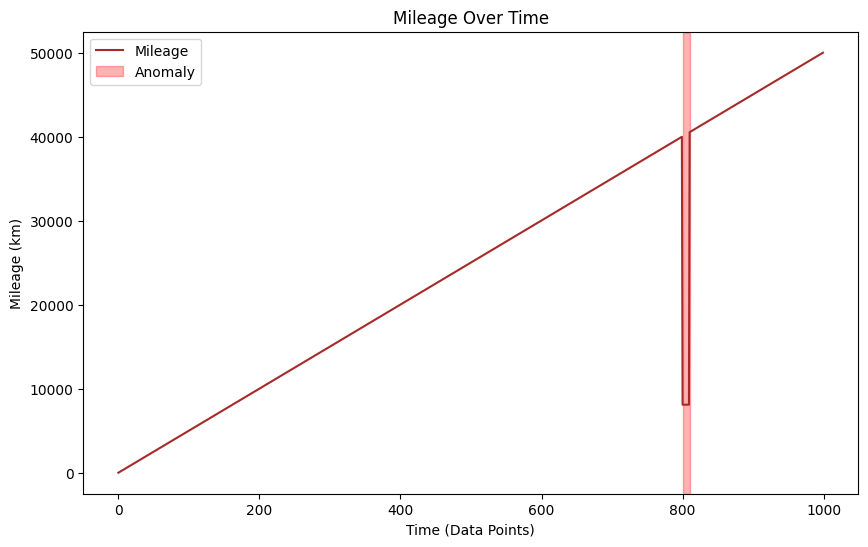

In [4]:
import matplotlib.pyplot as plt

# Plot Engine Temperature
plt.figure(figsize=(10,6))
plt.plot(df['engine_temperature'], label='Engine Temperature', color='blue')
plt.title('Engine Temperature Over Time')
plt.xlabel('Time (Data Points)')
plt.ylabel('Temperature (°C)')
plt.axvspan(50, 60, color='red', alpha=0.3, label='Anomaly')  # Highlight the anomaly region
plt.legend()
plt.show()

# Plot Battery Voltage
plt.figure(figsize=(10,6))
plt.plot(df['battery_voltage'], label='Battery Voltage', color='green')
plt.title('Battery Voltage Over Time')
plt.xlabel('Time (Data Points)')
plt.ylabel('Voltage (V)')
plt.axvspan(200, 210, color='red', alpha=0.3, label='Anomaly')  # Highlight the anomaly region
plt.legend()
plt.show()

# Plot Vibration Levels
plt.figure(figsize=(10,6))
plt.plot(df['vibration'], label='Vibration Levels', color='orange')
plt.title('Vibration Levels Over Time')
plt.xlabel('Time (Data Points)')
plt.ylabel('Vibration')
plt.axvspan(400, 410, color='red', alpha=0.3, label='Anomaly')  # Highlight the anomaly region
plt.legend()
plt.show()


# Plot Fuel Efficiency
plt.figure(figsize=(10,6))
plt.plot(df['fuel_efficiency'], label='Fuel Efficiency', color='purple')
plt.title('Fuel Efficiency Over Time')
plt.xlabel('Time (Data Points)')
plt.ylabel('Fuel Efficiency (km/l)')
plt.axvspan(600, 610, color='red', alpha=0.3, label='Anomaly')  # Highlight the anomaly region
plt.legend()
plt.show()

# Plot Mileage
plt.figure(figsize=(10,6))
plt.plot(df['mileage'], label='Mileage', color='brown')
plt.title('Mileage Over Time')
plt.xlabel('Time (Data Points)')
plt.ylabel('Mileage (km)')
plt.axvspan(800, 810, color='red', alpha=0.3, label='Anomaly')  # Highlight the anomaly region
plt.legend()
plt.show()


### preprocess the data

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['engine_temperature', 'battery_voltage', 'vibration', 'fuel_efficiency', 'mileage']])

# Convert labels to binary (0 = normal, 1 = anomaly)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Create a DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=['engine_temperature', 'battery_voltage', 'vibration', 'fuel_efficiency', 'mileage'])
scaled_df['label'] = df['label']


### Training

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X = scaled_df.drop('label', axis=1)  # Features
y = scaled_df['label']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.99      1.00      0.99       285

    accuracy                           0.99       300
   macro avg       0.99      0.90      0.94       300
weighted avg       0.99      0.99      0.99       300

Confusion Matrix:
[[ 12   3]
 [  0 285]]


### Training

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Assuming you have already split your data into X_train, X_test, y_train, y_test
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Initialize the model
gb_model.fit(X_train, y_train)  # Train the model
y_pred_gb = gb_model.predict(X_test)  # Make predictions on the test set
print("Classification Report for Gradient Boosting:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix for Gradient Boosting:\n", confusion_matrix(y_test, y_pred_gb))


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.99      1.00      0.99       285

    accuracy                           0.99       300
   macro avg       0.99      0.87      0.92       300
weighted avg       0.99      0.99      0.99       300

Confusion Matrix for Gradient Boosting:
 [[ 11   4]
 [  0 285]]


### Randomforest hypertuning

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Display best parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


### gradient boosting hypertuning

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
gb_model = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],  # Usually lower values for Gradient Boosting
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)

# Display best parameters
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


### RETRAIN rf with best parameters

In [16]:
# Train the Random Forest model with best parameters
best_rf_model = RandomForestClassifier(
    max_depth=10,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = best_rf_model.predict(X_test)

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report for Optimized Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix for Optimized Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Classification Report for Optimized Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.99      1.00      0.99       285

    accuracy                           0.99       300
   macro avg       0.99      0.90      0.94       300
weighted avg       0.99      0.99      0.99       300

Confusion Matrix for Optimized Random Forest:
[[ 12   3]
 [  0 285]]


### RETRAIN gd with best parameters

In [17]:
# Train the Gradient Boosting model with best parameters
best_gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)
best_gb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_gb = best_gb_model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report for Optimized Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

print("Confusion Matrix for Optimized Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))


Classification Report for Optimized Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.99      1.00      0.99       285

    accuracy                           0.99       300
   macro avg       0.99      0.90      0.94       300
weighted avg       0.99      0.99      0.99       300

Confusion Matrix for Optimized Gradient Boosting:
[[ 12   3]
 [  0 285]]


### Feature Importance

In [18]:
# For Random Forest
importances_rf = best_rf_model.feature_importances_
feature_names = X_train.columns  # Assumes X_train is a DataFrame
for name, importance in zip(feature_names, importances_rf):
    print(f"{name}: {importance:.4f}")

# For Gradient Boosting
importances_gb = best_gb_model.feature_importances_
for name, importance in zip(feature_names, importances_gb):
    print(f"{name}: {importance:.4f}")


engine_temperature: 0.1519
battery_voltage: 0.1987
vibration: 0.2628
fuel_efficiency: 0.1848
mileage: 0.2018
engine_temperature: 0.1349
battery_voltage: 0.1823
vibration: 0.2387
fuel_efficiency: 0.1511
mileage: 0.2930


### Visualizing the feature importance

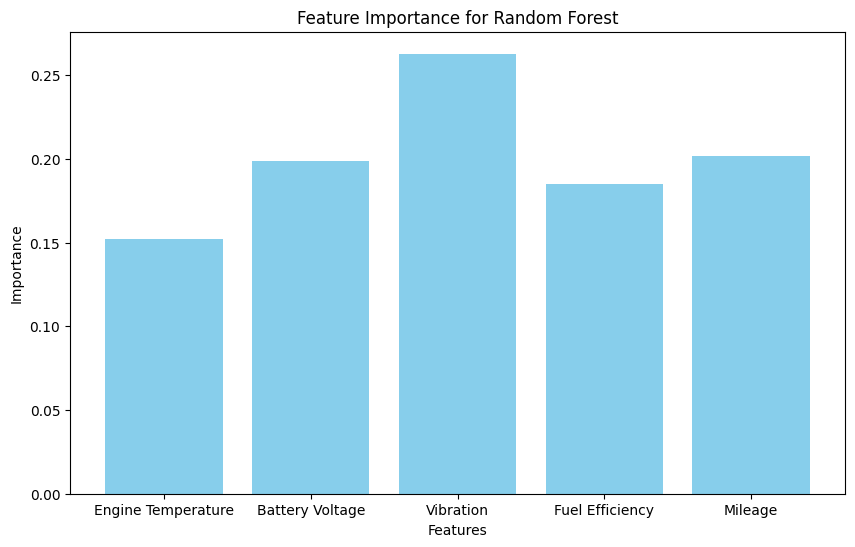

Text(0.5, 1.0, 'Feature Importance for Gradient Boostin')

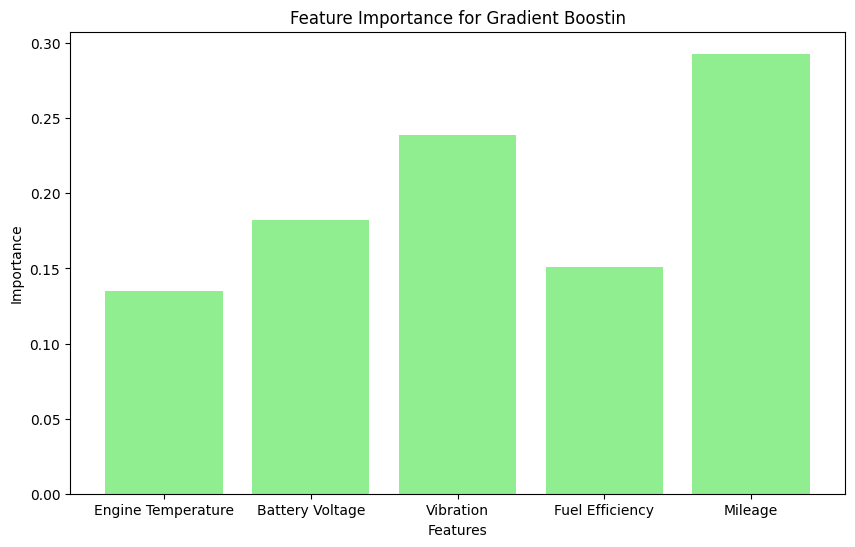

In [20]:
import matplotlib.pyplot as plt

# For Random Forest
rf_importances = [0.1519, 0.1987, 0.2628, 0.1848, 0.2018]
features = ['Engine Temperature', 'Battery Voltage', 'Vibration', 'Fuel Efficiency', 'Mileage']

plt.figure(figsize=(10, 6))
plt.bar(features, rf_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Random Forest')
plt.show()

# For Gradient Boosting
gb_importances = [0.1349, 0.1823, 0.2387, 0.1511, 0.2930]

plt.figure(figsize=(10, 6))
plt.bar(features, gb_importances, color='lightgreen')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Gradient Boostin')


In [25]:
import joblib

# Load the models again after updating scikit-learn
with open('random_forest_model.joblib', 'rb') as f:
    random_forest_model = joblib.load(f)

with open('gradient_boosting_model.joblib', 'rb') as f:
    gradient_boosting_model = joblib.load(f)



In [36]:
# Check the feature names in the trained model
print("Expected feature names:", random_forest_model.feature_names_in_)


Expected feature names: ['engine_temperature' 'battery_voltage' 'vibration' 'fuel_efficiency'
 'mileage']


In [37]:
import pandas as pd
import numpy as np
import joblib

# Load the models
random_forest_model = joblib.load('random_forest_model.joblib')
gradient_boosting_model = joblib.load('gradient_boosting_model.joblib')

# Define the feature names and input data in the correct order
feature_names = ['engine_temperature', 'battery_voltage', 'vibration', 'fuel_efficiency', 'mileage']
input_data = np.array([[80.0, 12.5, 3.0, 20.5, 150000]])  # Replace these values as needed

# Convert the input data to a DataFrame with the correct feature names
input_df = pd.DataFrame(input_data, columns=feature_names)

# Random Forest Prediction
rf_prediction = random_forest_model.predict(input_df)[0]
print(f"Random Forest Prediction: {rf_prediction}")

# Gradient Boosting Prediction
gb_prediction = gradient_boosting_model.predict(input_df)[0]
print(f"Gradient Boosting Prediction: {gb_prediction}")


Random Forest Prediction: 1
Gradient Boosting Prediction: 1


In [39]:
import sklearn
import numpy
print("scikit-learn version:", sklearn.__version__)
print("numpy version:", numpy.__version__)


scikit-learn version: 1.2.2
numpy version: 1.24.3
